In [1]:
import numpy as np
import radio_plotter as rp
import tqdm

In [2]:
pos = np.load("./positions.npy")

In [3]:
pulse = np.load("./pulses.npy")

In [4]:
pos.shape

(3, 174)

In [5]:
pulse.shape

(174, 3344, 4)

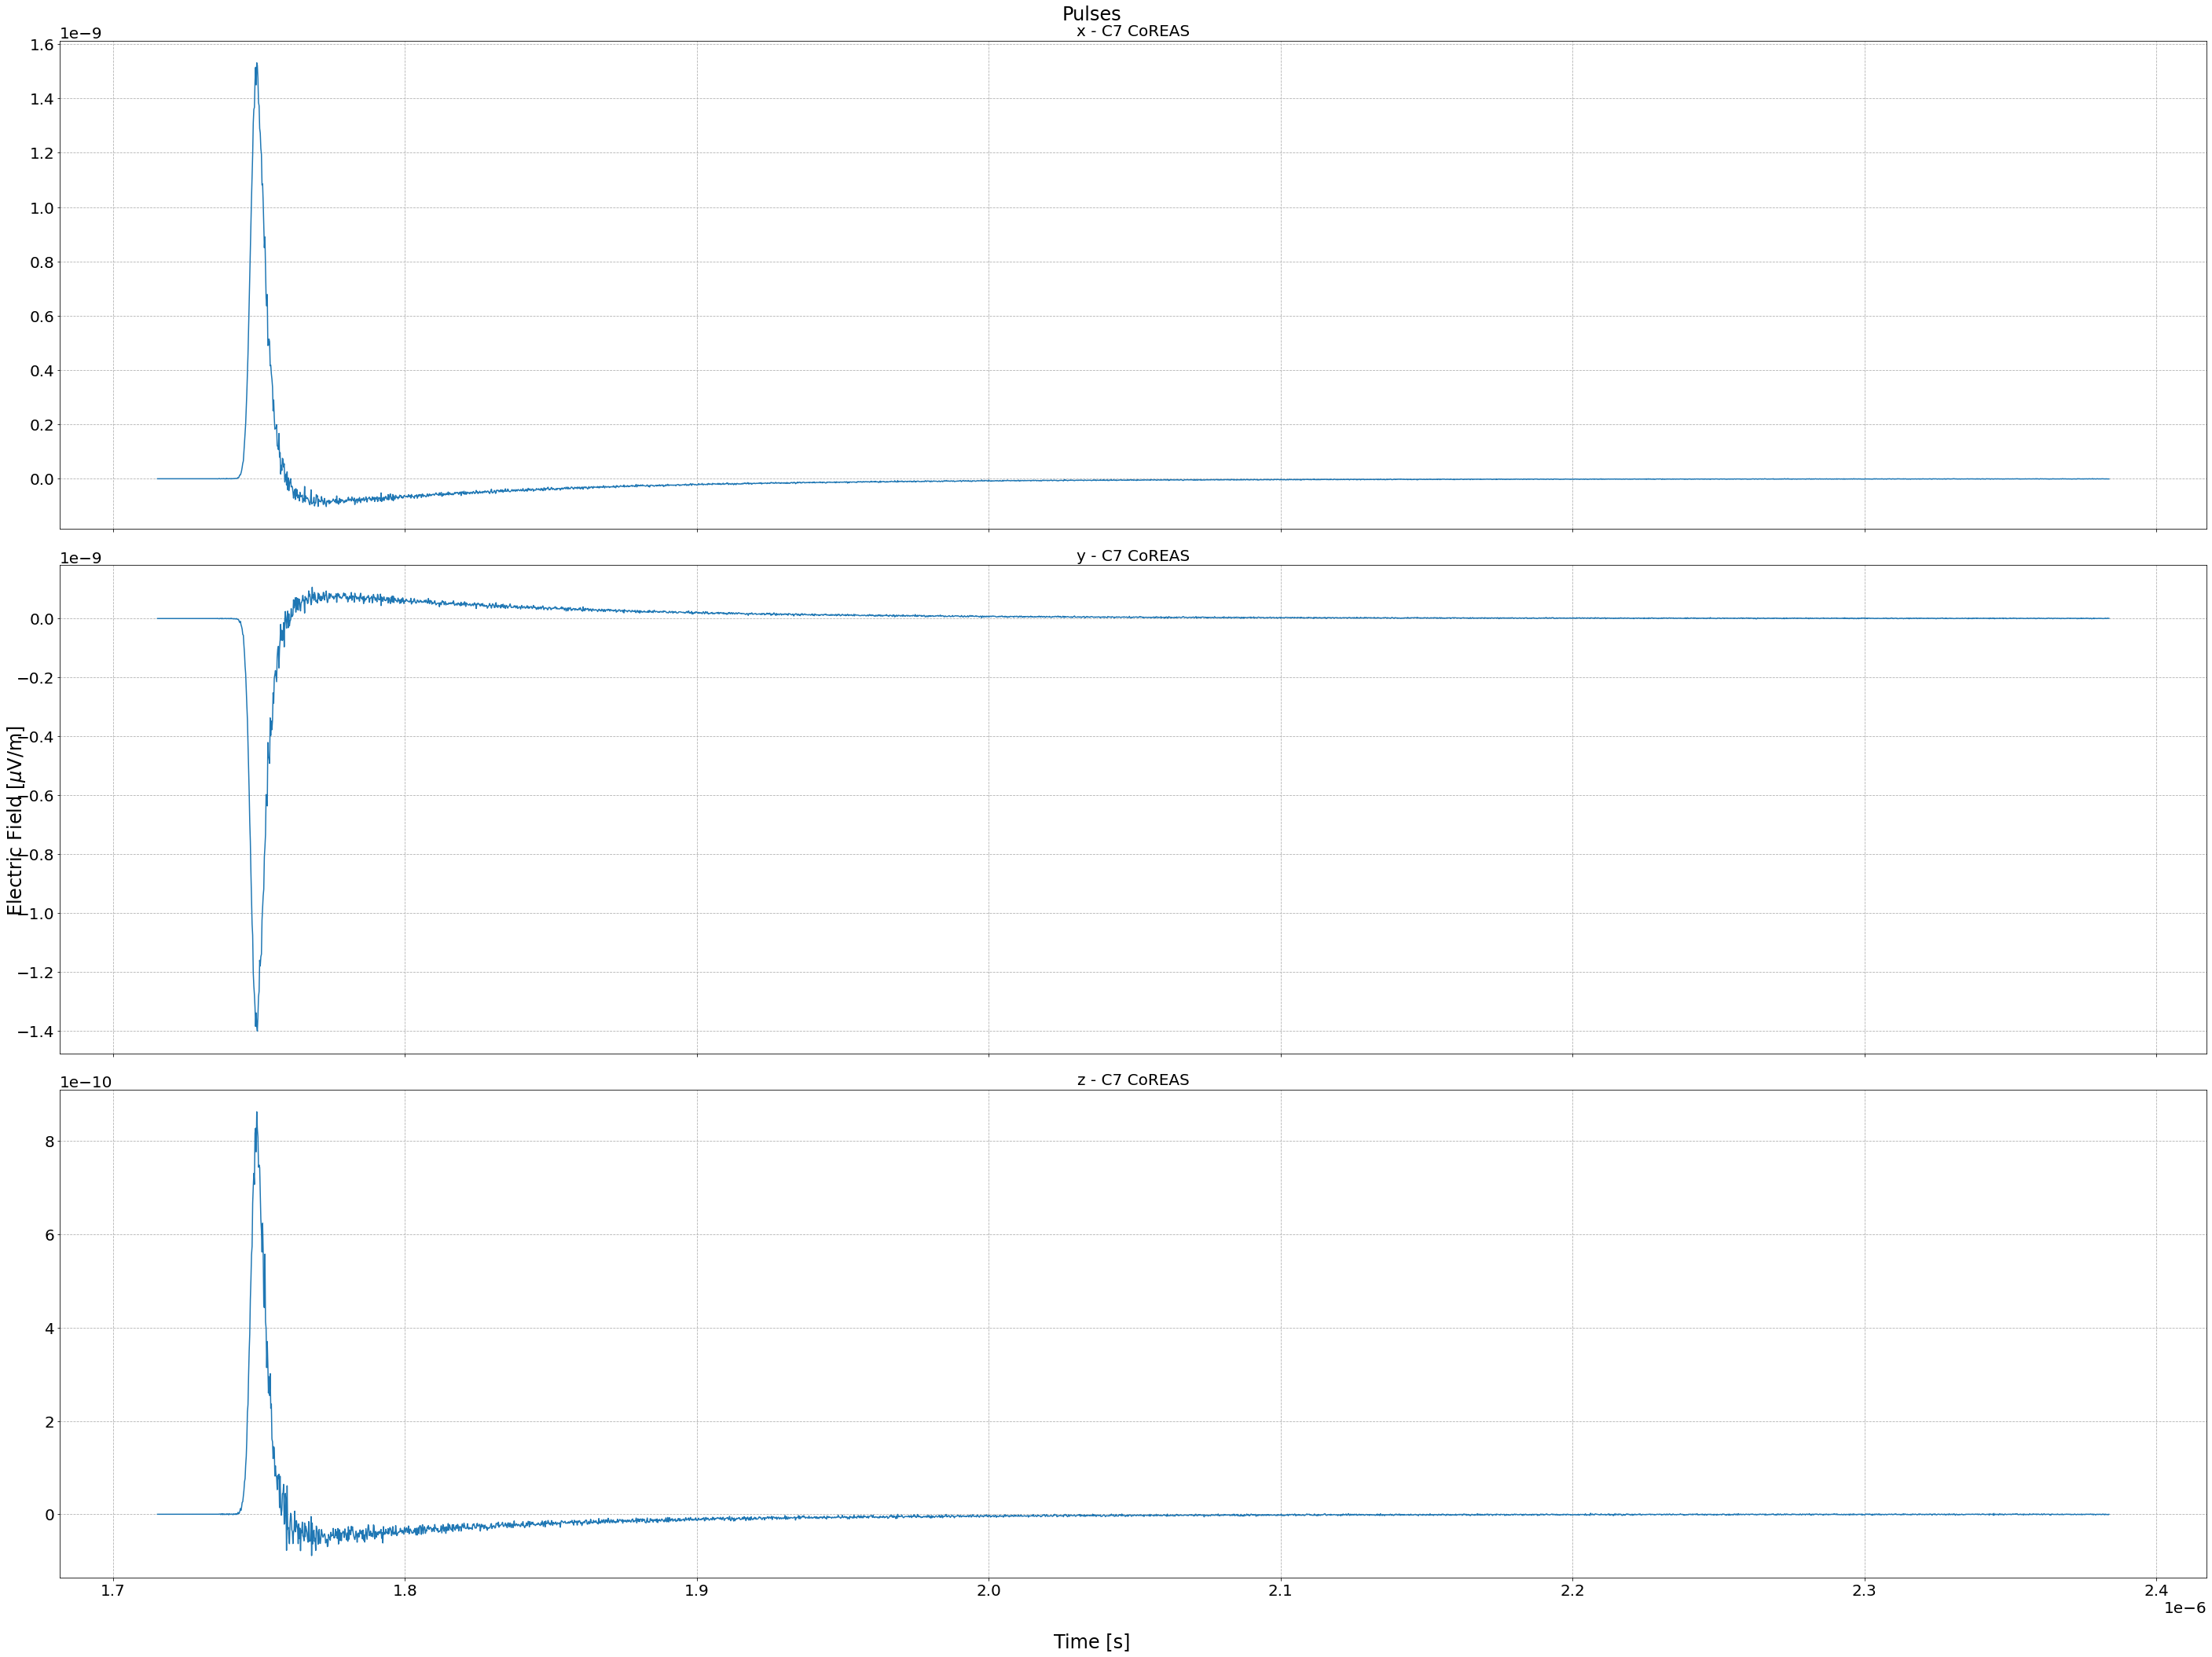

In [6]:
rp.plot_pulses(pulse[0])

160 160
160
vmin =  3.0276670097022956e-11
vmax =  3.40053695562308e-09


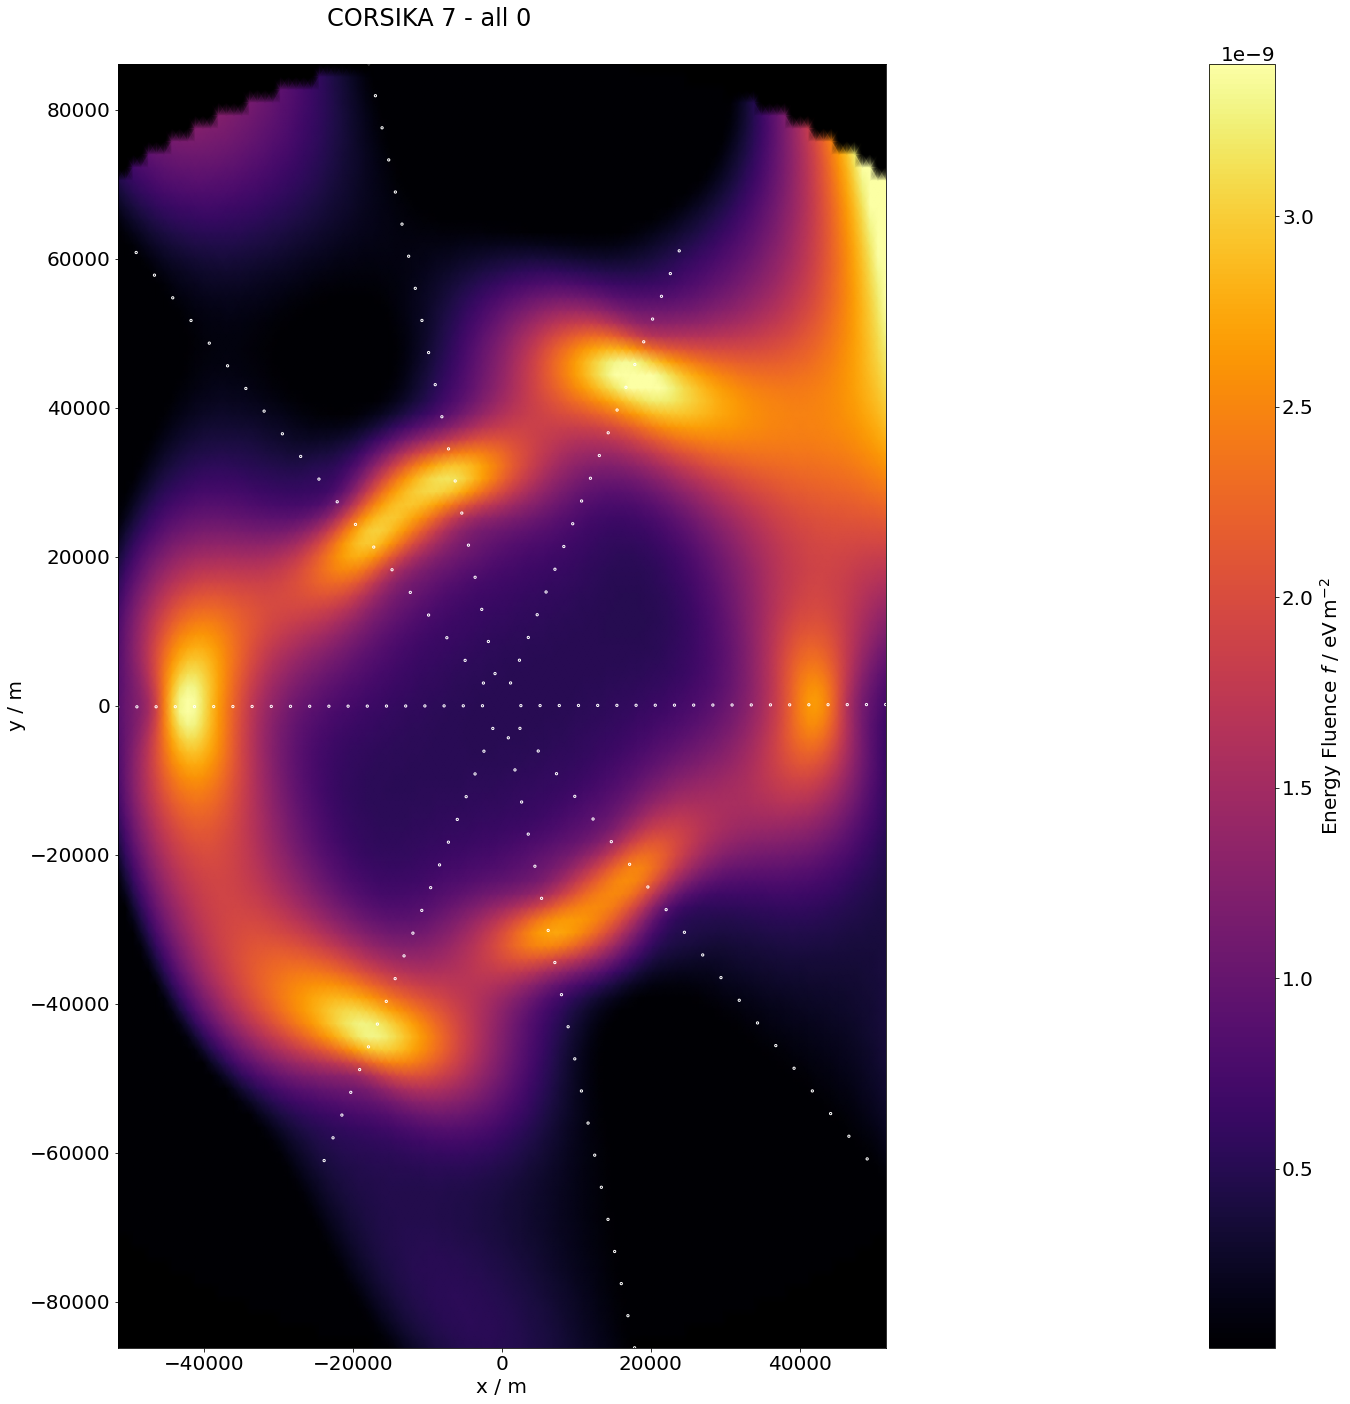

vmin =  2.234053314169761e-11
vmax =  2.6966384781887588e-09


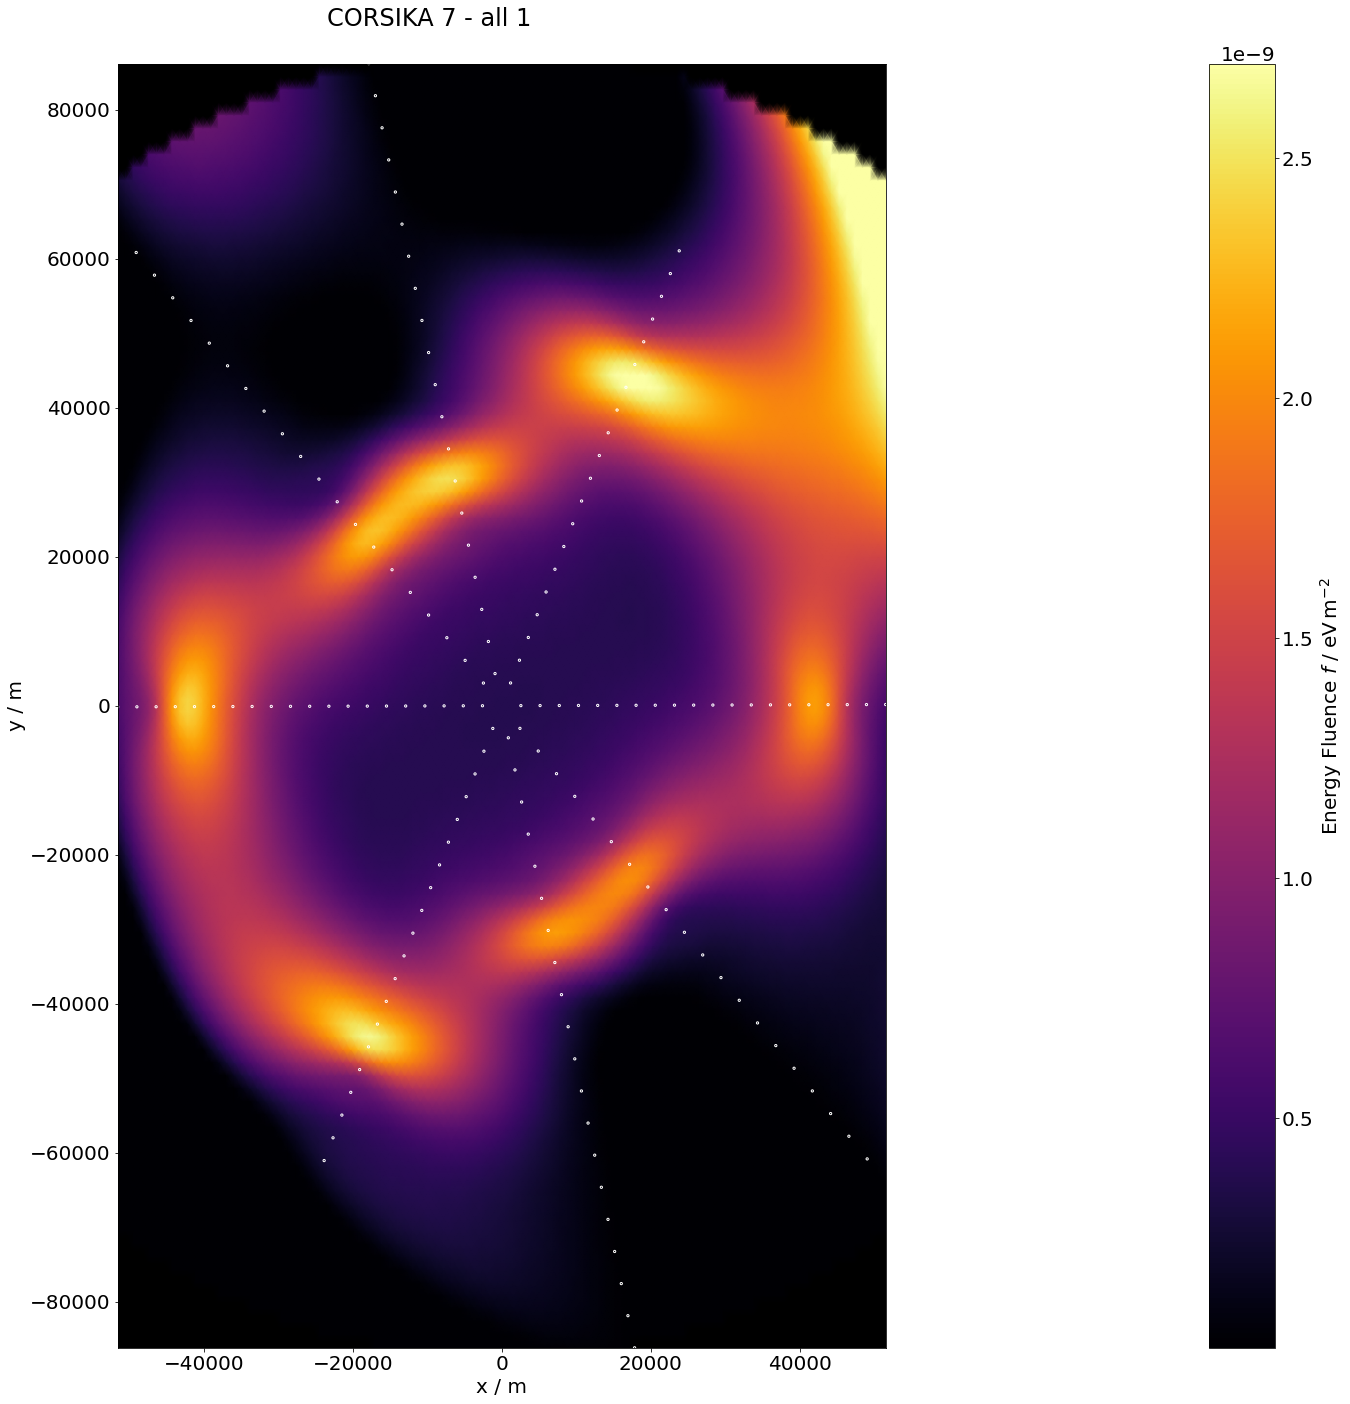

vmin =  9.718762565759907e-12
vmax =  1.211618584914408e-09


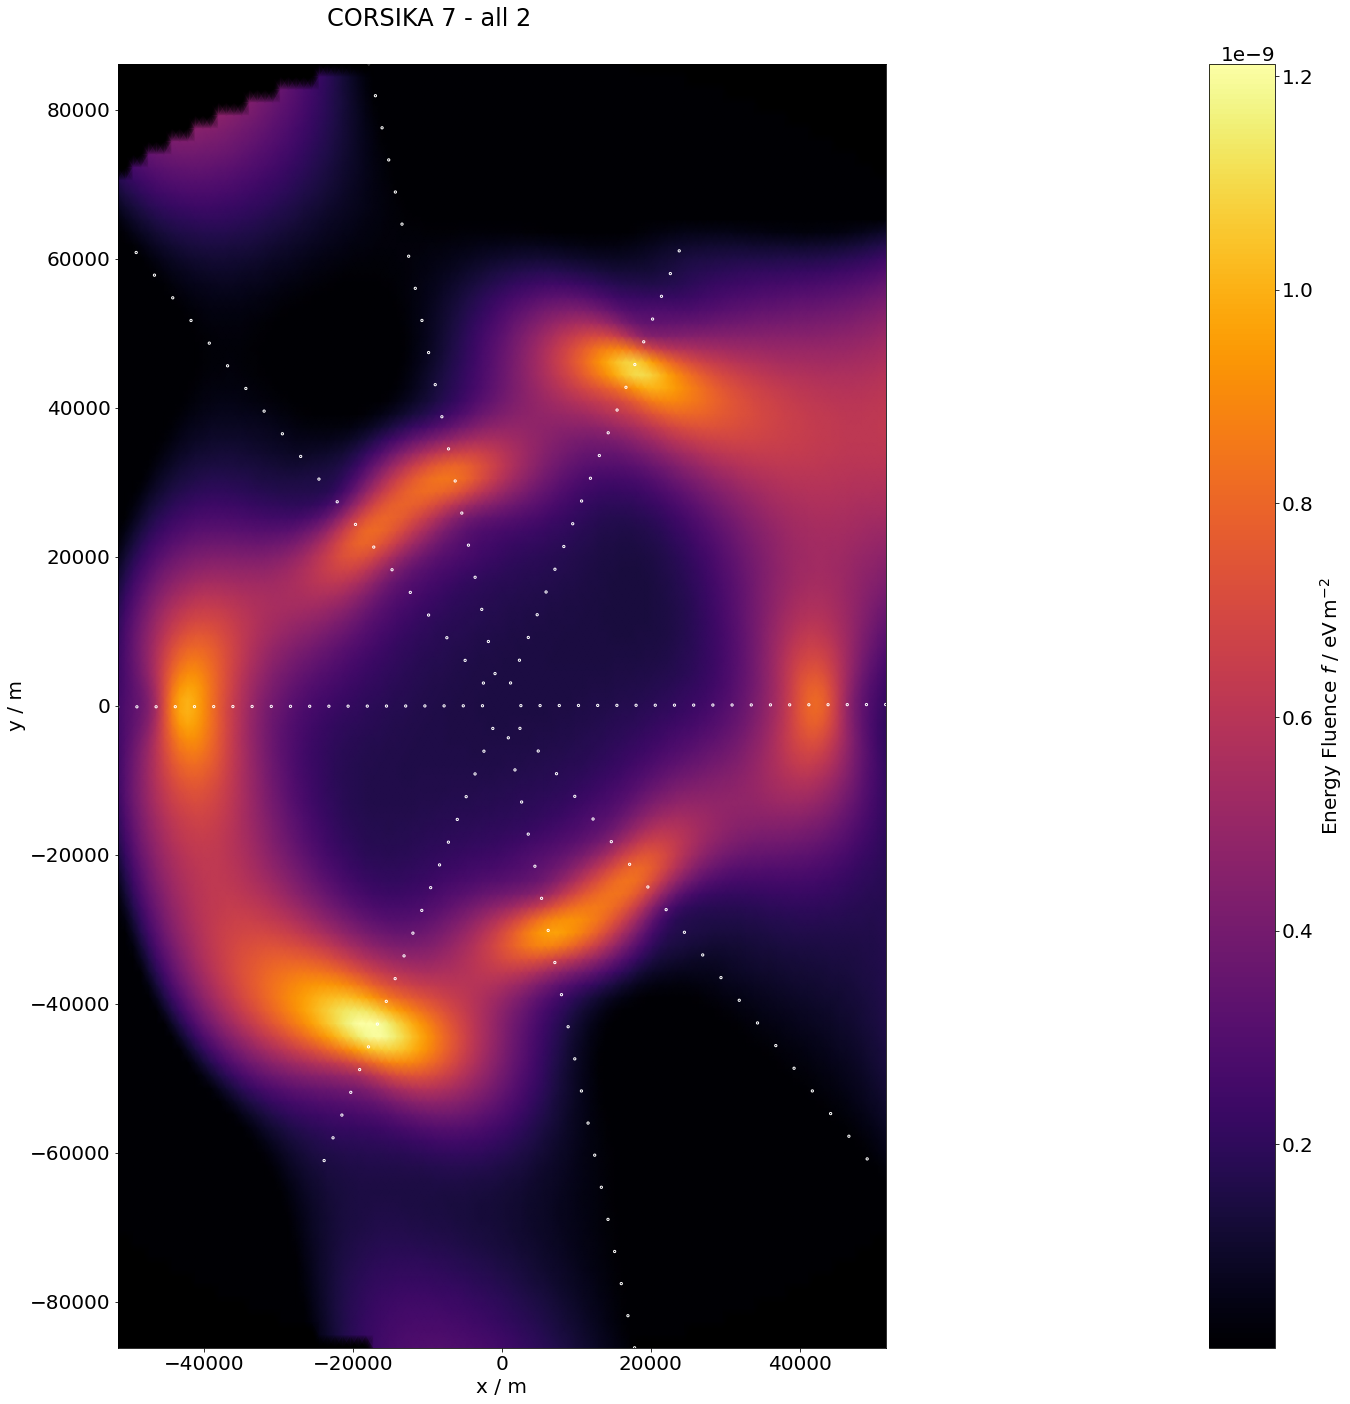

In [7]:
rp.plot_fluence_maps(pulse[14:], pos[:, 14:].T)

In [8]:
pos[13:].T.shape

(174, 0)

In [9]:
from radiotools import helper as rdhelp
from radiotools import coordinatesystems

Bx = 26.860
Bz = 49.687
THETAP = 65
PHIP = 38
zenith = np.deg2rad(THETAP)
azimuth = 3 * np.pi / 2.0 + np.deg2rad(PHIP)  # convert to auger cs
azimuth = rdhelp.get_normalized_angle(azimuth)
B_inclination = np.arctan2(Bz, Bx)
B_declination = np.deg2rad(0.12532)
observation_height = 1200
B_strength = (Bx**2 + Bz**2) ** 0.5
magnetic_field_vector = rdhelp.spherical_to_cartesian(
    rdhelp.get_magneticfield_zenith(B_inclination), B_declination + np.pi * 0.5
)  # in auger cooordinates north is + 90 deg

ctrans = coordinatesystems.cstrafo(
    zenith, azimuth, magnetic_field_vector=magnetic_field_vector
)

In [10]:
antenna_position = np.zeros_like(pos.T)
core = (
    np.array(
        [
            -1 * 0,
            0,
            120000.0,
        ]
    )
    * 1e-2
)
r = np.tan(zenith) * (observation_height - core[2])
deltax = np.cos(azimuth) * r
deltay = np.sin(azimuth) * r
antenna_position[..., 0] -= deltax
antenna_position[..., 1] -= deltay
for i in tqdm.trange(len(pulse)):
    pulse[i, :, 1:4] = ctrans.transform_to_vxB_vxvxB(pulse[i, :, 1:4])

    position = pos.T[i]
    antenna_position[i, 0], antenna_position[i, 1], antenna_position[i, 2] = (
        -position[1] / 100.0,
        position[0] / 100.0,
        position[2] / 100.0,
    )
    core[2] = 1200
station_positions_transformed = ctrans.transform_to_vxB_vxvxB(
    antenna_position, core=core
)
pos = station_positions_transformed.T

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:02<00:00, 65.98it/s]


160 160
160
vmin =  1.7069393221539254e-12
vmax =  2.5339328447576864e-10


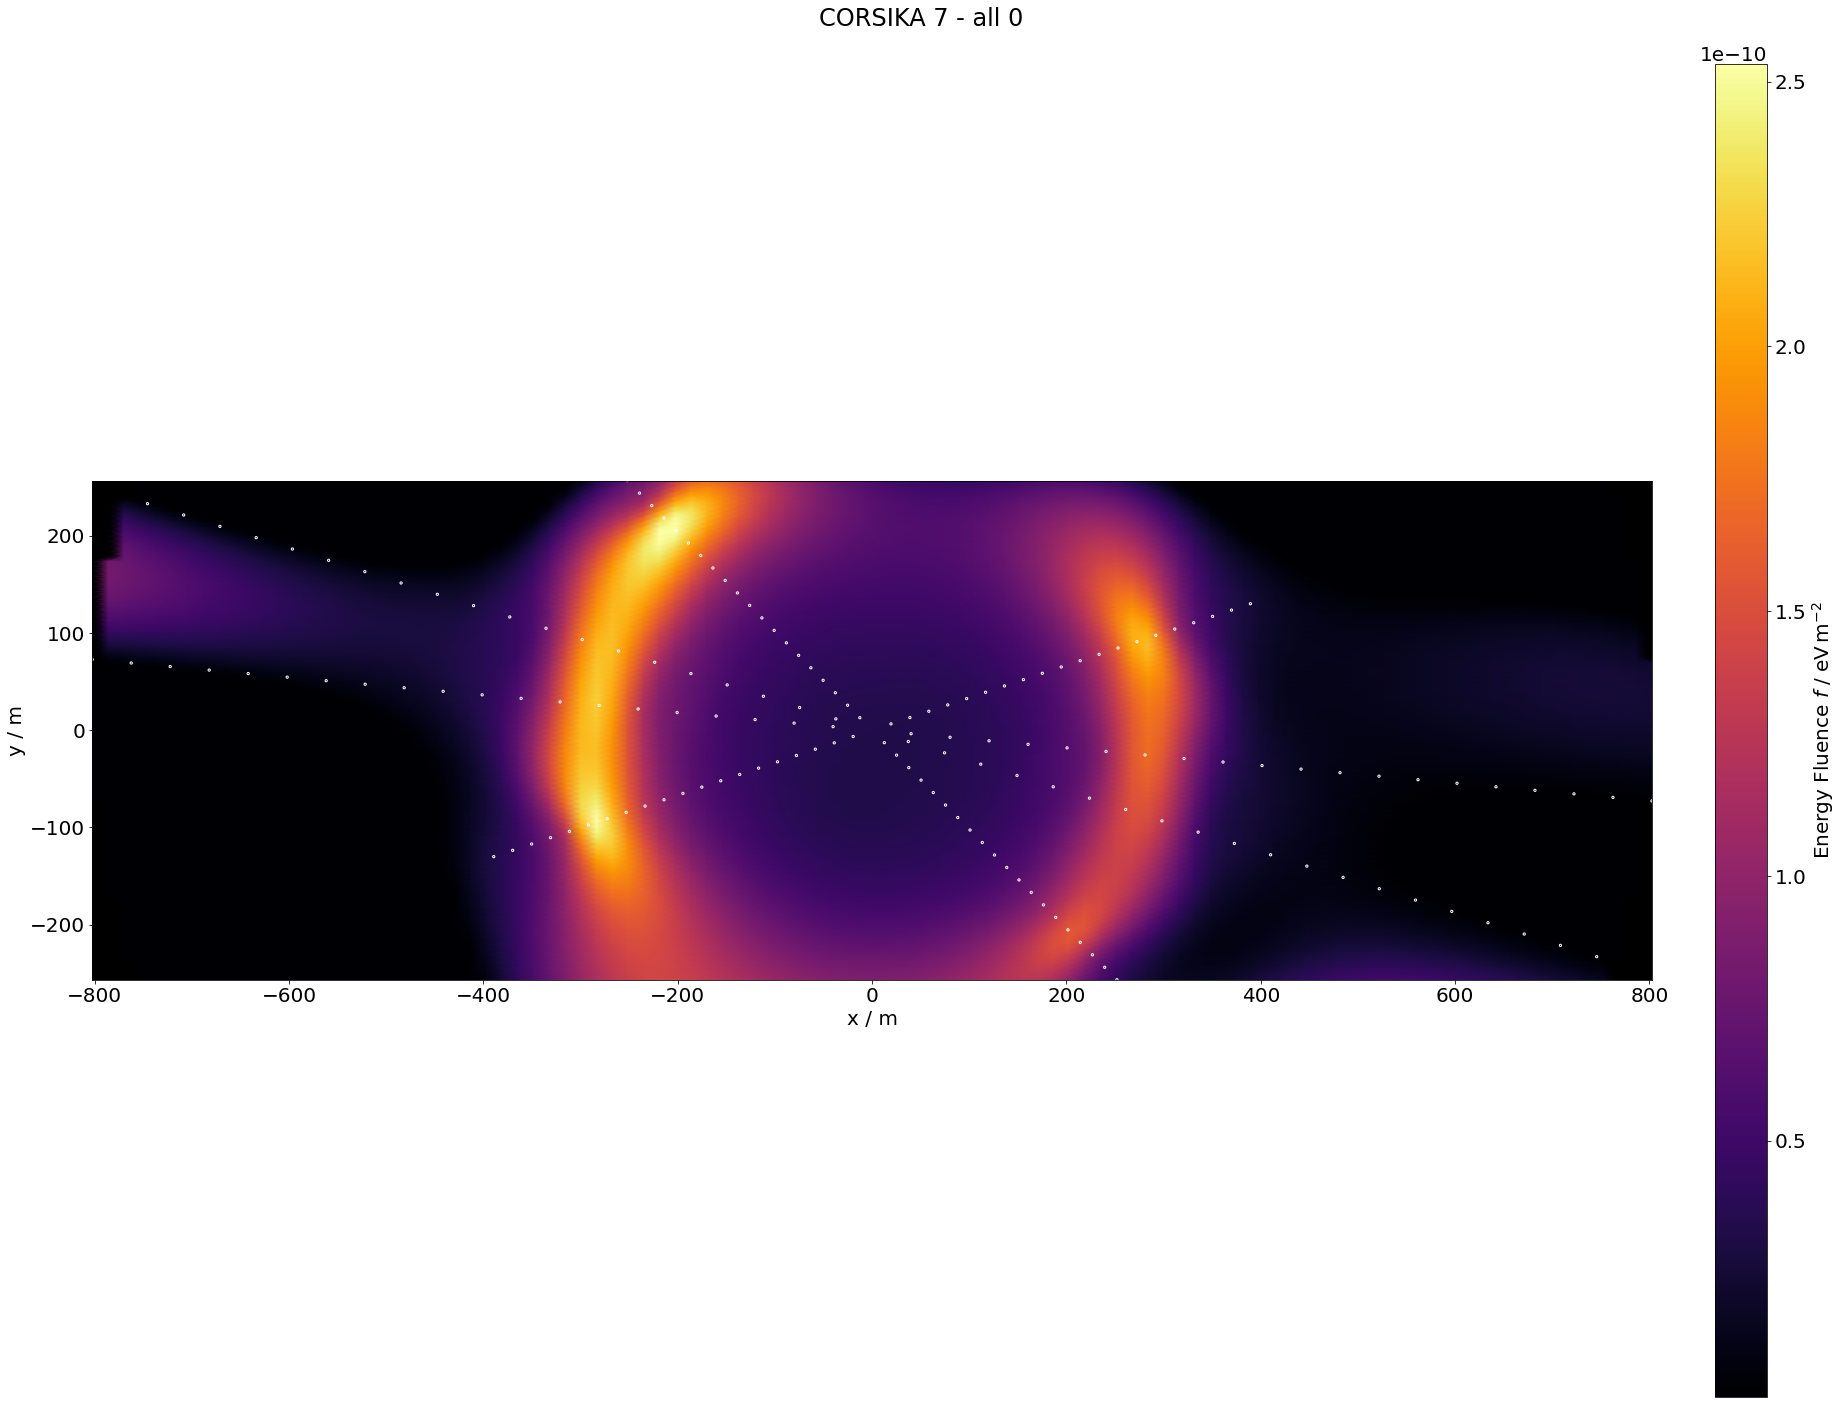

vmin =  4.159176032283287e-13
vmax =  3.2121778283280087e-10


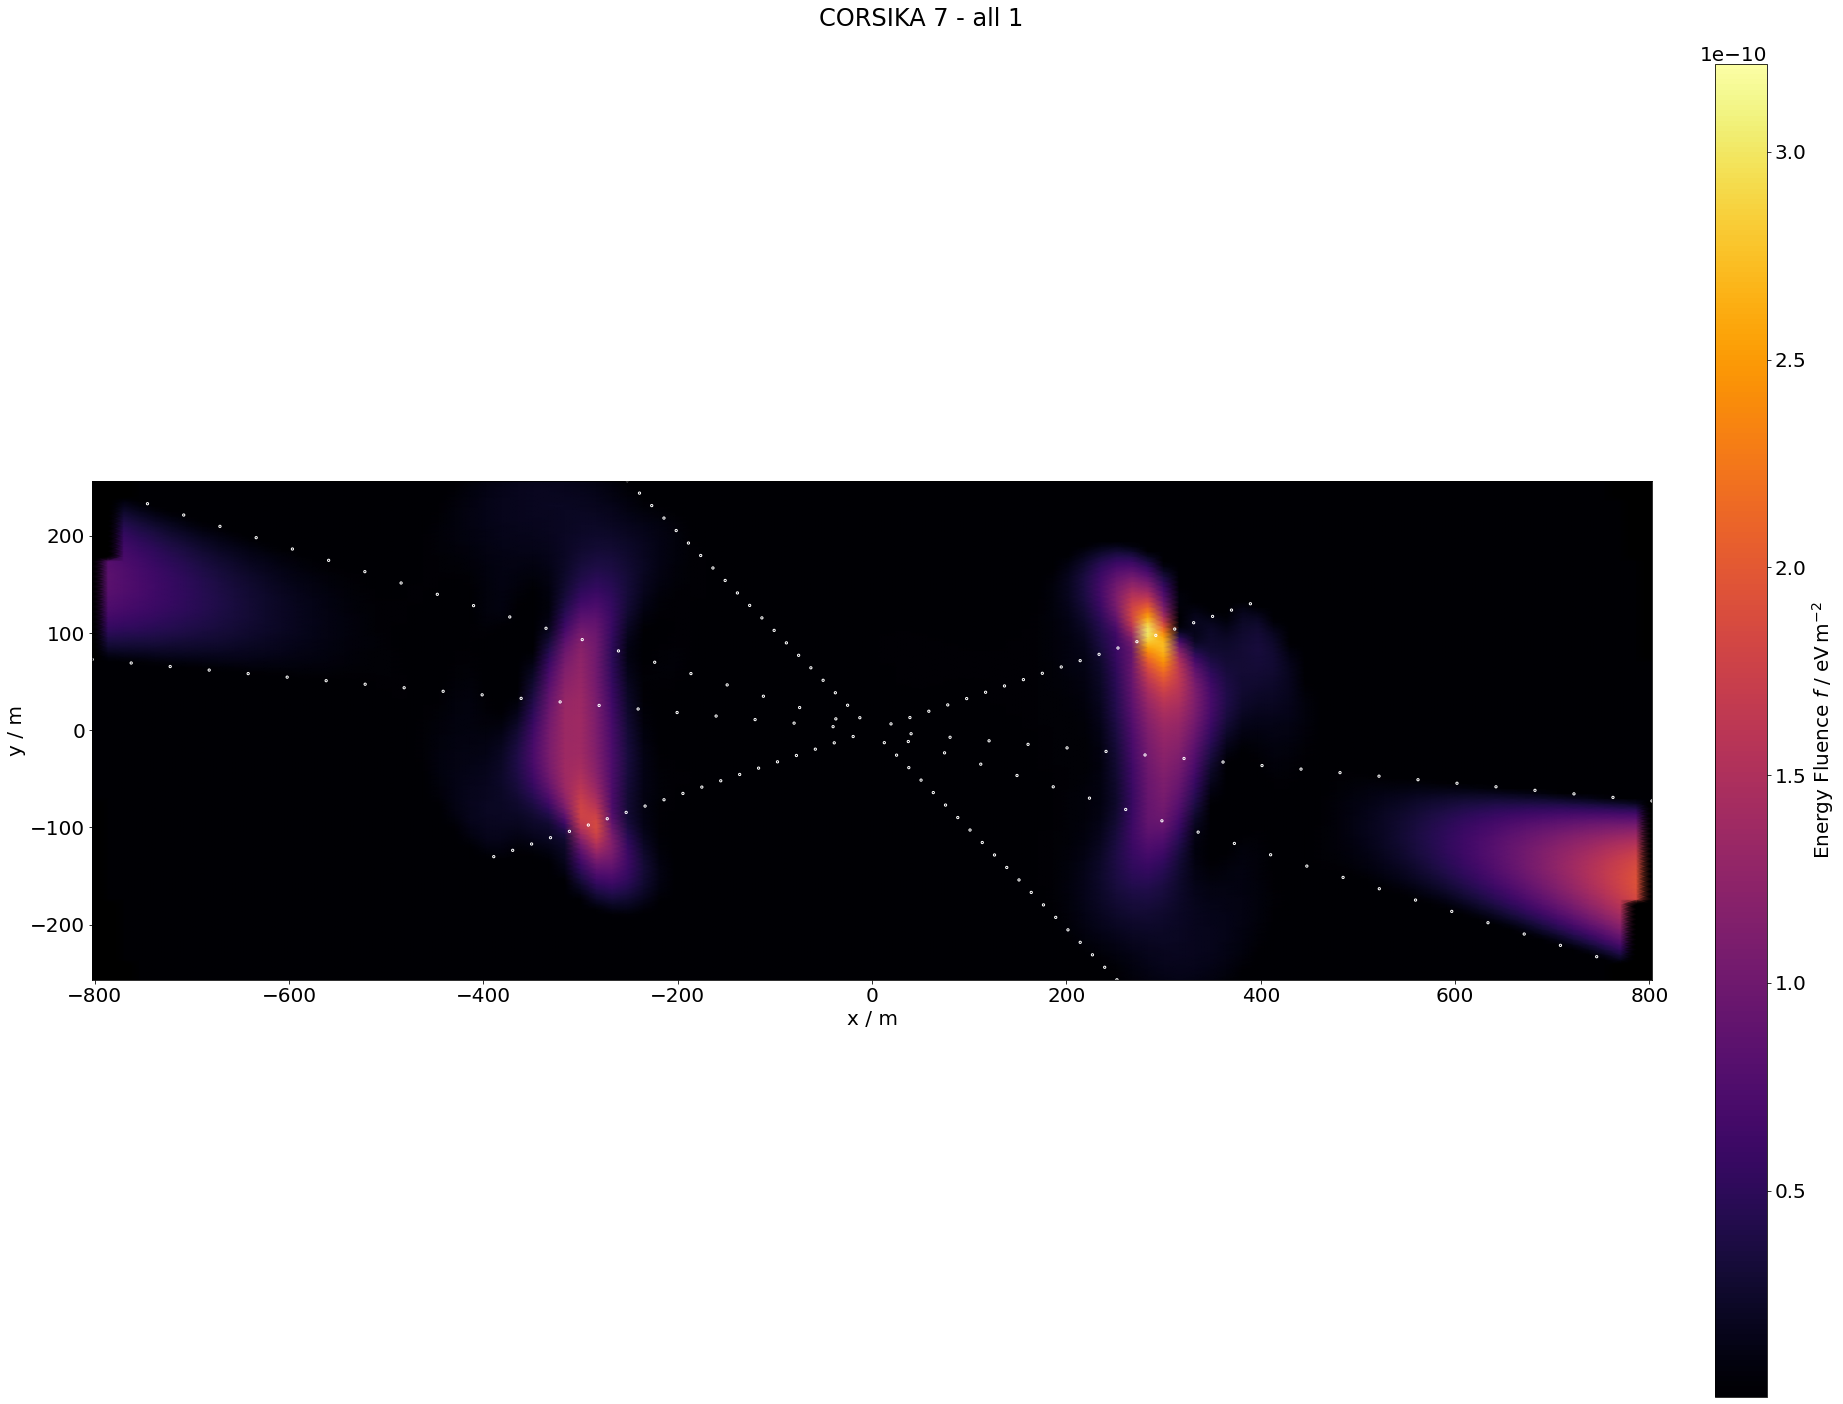

vmin =  6.310398046381916e-11
vmax =  6.643129505448963e-09


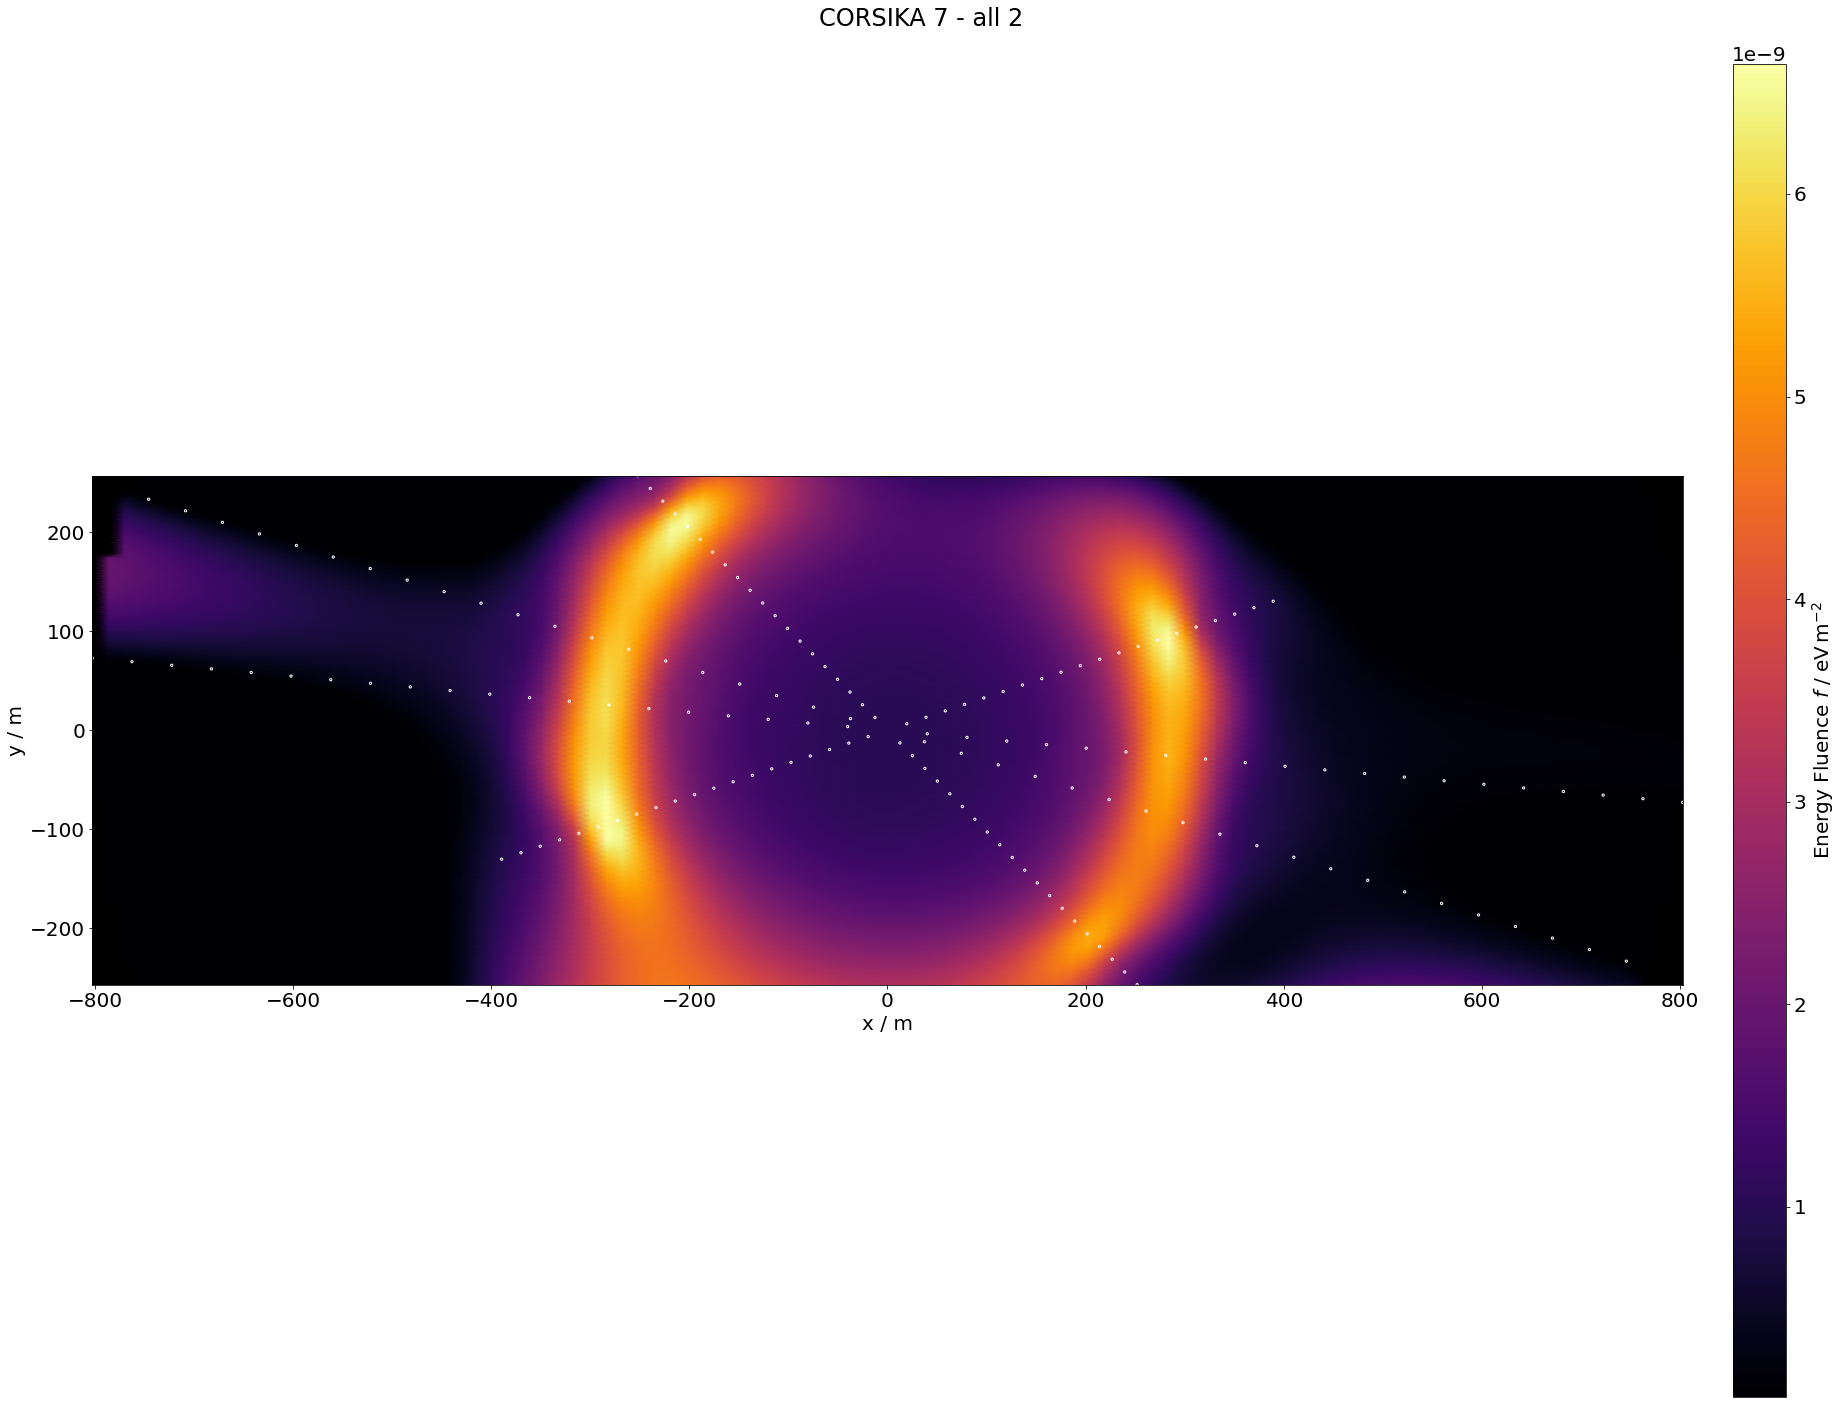

In [11]:
rp.plot_fluence_maps(pulse[14:], pos[:, 14:].T)